# Cálculo de la probabilidad de al menos 1 victoria tras n tiradas en un juego con una probabilidad p de ganar en una tirada

$\Large P = {\sum_{m=1}^n} {\begin{equation} {n \choose m} {\frac {p^{m} (1-p)^{n-m}}{100^{n}}} \end{equation}}$

Eso es lo que sale tras darle unas vueltas e inducir la fórmula, siendo:  

p: Probabilidad de ganar en 1 tirada.  
n: Número de tiradas  
P: Probabilidad de al menos 1 victoria tras n tiradas

Por ejemplo, ¿qué probabilidad hay de que ocurra un suceso que tiene un 1% de probabilidades de ocurrir tras 100 intentos o tiradas? Que ocurra en 1 de cada 100 no significa que en un grupo de 100 haya 1 con seguridad. Esta P por tanto no es 100%, sino, como veremos, cerca del 63%  

¿Cuál es la probabilidad de que ocurra al menos 1 suceso cuando p es 1 entre 1000, tras 1000 tiradas? ¿Y cuando p es 1 entre 10.000 tras 10.000 tiradas? Etc. ¿A qué tiende P cuando p es muy pequeño y n es muy grande proporcionalmente hablando? Veremos que **P tiende a $1 - \Large \frac{1}{e}$** cuando p=1/chances muy pequeña y n=chances muy grande.

**Explicación de la fórmula: desarrollo para p = 1% y n = 4:**

$P = \frac{1}{100}·\frac{99}{100} ·\frac{99}{100}·\frac{99}{100} · 4  +  \frac{1}{100}·\frac{1}{100} ·\frac{99}{100}·\frac{99}{100} ·6 +  \frac{1}{100}·\frac{1}{100} ·\frac{1}{100}·\frac{99}{100}·4  + \frac{1}{100}·\frac{1}{100} ·\frac{1}{100}·\frac{1}{100} ·1 $  

Probabilidad de 1 acierto (el 1º y el resto no, el 2º y el resto no, etc., 4 en total) + probabilidad de 2 aciertos (1º y 2º, 1º y 3º, etc., en total 6 combinaciones) + probabilidad de 3 aciertos + probabilidad de 4 aciertos. Por tanto, P respresenta la **probabilidad de acertar al menos 1 vez**

In [1]:
def factorial(x):
    resultado = 1
    i = 1
    while i <= x:
        resultado = resultado*i
        i += 1
    return resultado
factorial(6)

720

In [36]:
def combinatorio(n,m):
    """Devuelve el número conbinatorio n sobre m"""
    resultado = factorial(n)/(factorial(m)*factorial(n-m))
    return int(resultado)
combinatorio(10,3)

120

In [37]:
def P(p, tiradas):
    """Esta función devuelve la probabilidad de obtener al menos 1 victoria al jugar 'tiradas' 
    veces a un juego con una probabilidad p de ganar en cada tirada"""
    """p: Probabilidad en tanto por ciento (%)"""
    
    prob = 0
    for m in range(1,tiradas+1):
        p_m = combinatorio(tiradas,m)*(p**m * (100-p)**(tiradas - m))/(100**tiradas)
        prob += p_m
    
    return prob

In [14]:
P(1,3)

0.029700999999999998

In [171]:
def combinatorio_actualizado(n,m):
    """Devuelve el número conbinatorio n sobre m"""
    if m < n/2:
        resultado = 1
        k = 0
        while k < m:
            resultado *= (n-k) 
            k += 1
        resultado /= factorial(m)
    else:
        resultado = 1
        k = 0
        while k < n-m-1:
            resultado *= (n-k) 
            k += 1
        resultado /= factorial(n-m)
        
    return int(resultado)

combinatorio_actualizado(10,3)

120

In [195]:
def combinatorio_actualizado(n,m):
    """Devuelve el número conbinatorio n sobre m"""
    """Otra manera de calcular el combinatorio simplificando para no tener que manejar numeros tan grandes"""
    
    resultado = 1
    for k in range(m):
        resultado *= (n-k)/(m-k)
    return int(resultado)
combinatorio_actualizado(10,3)

120

In [196]:
def P_actualizado(p, tiradas):
    """Esta función devuelve la probabilidad de obtener al menos 1 victoria al jugar 'tiradas' 
    veces a un juego con una probabilidad p de ganar en cada tirada"""
    """p: Probabilidad en tanto por ciento (%)"""
    
    prob = 0
    for m in range(1,tiradas+1):
        p_m = combinatorio_actualizado(tiradas,m)*(p/(100-p))**m * ((100-p)/100)**tiradas
        prob += p_m
    
    return prob

In [1]:
def P_actualizado_actualizado(p, tiradas):
    """Esta función devuelve la probabilidad de obtener al menos 1 victoria al jugar 'tiradas' 
    veces a un juego con una probabilidad p de ganar en cada tirada"""
    """p: Probabilidad en tanto por ciento (%)"""
    
    """Para que valga para grandes valores de 'tiradas', sustituyo la función combinatorio
    par que no tenga que calcular un número tan grande, intercalando los factores del combinatorio
    con factores (p/100-p), que son pequeños"""
    
    prob = 0
    for m in range(1,tiradas+1):
        p_m = 1
        for k in range (m): #Esto sustituye a combinatorio_actualizado
            p_m *= ((tiradas-k)/(m-k))*(p/(100-p))
        p_m *= ((100-p)/100)**tiradas
        prob += p_m
        
        if m % 10000 == 0:
            print("{} de {} completado".format(m,tiradas))
    
    return prob

In [2]:
P_actualizado_actualizado(63.2120558, 2)

0.8646647161537687

**P_actualizado_actualizado:**

$\Large {n \choose m} {\frac {p^{m} (1-p)^{n-m}}{100^{n}}} = {n \choose m} {(\frac{p}{100-p})^m} {(\frac{100-p}{100})^n} = [\frac{n}{m} · (\frac{p}{100-p}) · \frac{n-1}{m-1} · (\frac{p}{100-p})]·{(\frac{100-p}{100})^n}$  

Esto es lo que he hecho en P_actualizado_actualizado: Intercalo factores grandes con factores pequeños en lugar de tener que calcular números combinatorios tan grandes cuando el resultado final no será tan grande. Con el combinatorio por separado, me daba error ya para el cálculo P_actualizado(1e-2,10000)

In [188]:
P_actualizado(0.1,1000)

0.6323045752291058

In [204]:
P_actualizado_actualizado(1e-2,10000)

0.6321389535664379

In [211]:
P_actualizado_actualizado(1e-3,100000)

10000 de 100000 completado
20000 de 100000 completado
30000 de 100000 completado
40000 de 100000 completado
50000 de 100000 completado
60000 de 100000 completado
70000 de 100000 completado
80000 de 100000 completado
90000 de 100000 completado
100000 de 100000 completado


0.6321223982292868

In [207]:
import math
1-1/math.exp(1)

0.6321205588285577

In [201]:
P_actualizado_actualizado(0.1,1000)

0.6323045752291058

In [19]:
for tiradas in range(10):
    print(P(1,tiradas))

0
0.01
0.0199
0.029700999999999998
0.03940399
0.0490099501
0.058519850599
0.06793465209301
0.0772553055720799
0.0864827525163591


In [18]:
import matplotlib.pyplot as plt

In [39]:
lista = []
for tiradas in range(100):
    lista.append([P(1,tiradas)])
lista[-10:]

[[0.5952680273216757],
 [0.5993153470484592],
 [0.6033221935779745],
 [0.6072889716421948],
 [0.6112160819257727],
 [0.6151039211065151],
 [0.6189528818954501],
 [0.6227633530764957],
 [0.6265357195457306],
 [0.6302703623502731]]

In [129]:
lista = []
for tiradas in range(1000):
    lista.append([P(1,tiradas)])
    if tiradas % 50 == 0:
        print("{}/1000".format(tiradas))
lista[-5:]

0/1000
50/1000
100/1000
150/1000
200/1000
250/1000
300/1000
350/1000
400/1000
450/1000
500/1000
550/1000
600/1000
650/1000
700/1000
750/1000
800/1000
850/1000
900/1000
950/1000


[[0.9999546038915809],
 [0.9999550578526655],
 [0.9999555072741386],
 [0.999955952201397],
 [0.9999563926793827]]

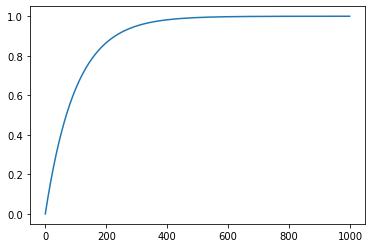

In [130]:
plt.plot(lista)

In [44]:
import numpy as np

In [138]:
print("p = 1")
for tiradas in [1,5,10,25,100,200,500,750]:
    pp = lista[tiradas][0]
    p = round(lista[tiradas][0],3)
    print("{} tiradas: {}% probabilidad de al menos 1 victoria".format(tiradas,pp*100))

p = 1
1 tiradas: 1.0% probabilidad de al menos 1 victoria
5 tiradas: 4.90099501% probabilidad de al menos 1 victoria
10 tiradas: 9.561792499119552% probabilidad de al menos 1 victoria
25 tiradas: 22.217864060085322% probabilidad de al menos 1 victoria
100 tiradas: 63.396765872677044% probabilidad de al menos 1 victoria
200 tiradas: 86.60203251420381% probabilidad de al menos 1 victoria
500 tiradas: 99.34295169575856% probabilidad de al menos 1 victoria
750 tiradas: 99.9467406394113% probabilidad de al menos 1 victoria


In [127]:
P(1,10)*100

9.561792499119552

Esto era para p = 1, **veamos más valores de p**

In [84]:
P(2,130)

0.9276581118159495

In [85]:
numeros = [1,2,3]
numeros.append(P(2,130))

In [86]:
numeros

[1, 2, 3, 0.9276581118159495]

In [79]:
Lista = []
for p in [2,10,25,50,75]:
    lista = []
    for tiradas in range(500):
        lista.append(P(p,tiradas))
    print("p = {} completado".format(p))
    Lista.append(lista)

p = 2 completado
p = 10 completado
p = 25 completado
p = 50 completado
p = 75 completado


In [139]:
probabilidades = [2,10,25,50,75]
for i,lista in enumerate(Lista):
    print("\np = {}".format(probabilidades[i]))
    for tiradas in [1,2,4,10,25,50,100,200]:
        p = lista[tiradas]
        print("{} tiradas: {}% probabilidad de al menos 1 victoria".format(tiradas,p*100))


p = 2
1 tiradas: 2.0% probabilidad de al menos 1 victoria
2 tiradas: 3.9599999999999995% probabilidad de al menos 1 victoria
4 tiradas: 7.763183999999999% probabilidad de al menos 1 victoria
10 tiradas: 18.29271931124531% probabilidad de al menos 1 victoria
25 tiradas: 39.65352702211031% probabilidad de al menos 1 victoria
50 tiradas: 63.58303199128829% probabilidad de al menos 1 victoria
100 tiradas: 86.73804441052472% probabilidad de al menos 1 victoria
200 tiradas: 98.24120533942786% probabilidad de al menos 1 victoria

p = 10
1 tiradas: 10.0% probabilidad de al menos 1 victoria
2 tiradas: 19.0% probabilidad de al menos 1 victoria
4 tiradas: 34.39% probabilidad de al menos 1 victoria
10 tiradas: 65.13215598999999% probabilidad de al menos 1 victoria
25 tiradas: 92.82102012308148% probabilidad de al menos 1 victoria
50 tiradas: 99.484622479268% probabilidad de al menos 1 victoria
100 tiradas: 99.99734386011123% probabilidad de al menos 1 victoria
200 tiradas: 99.99999992944922% prob

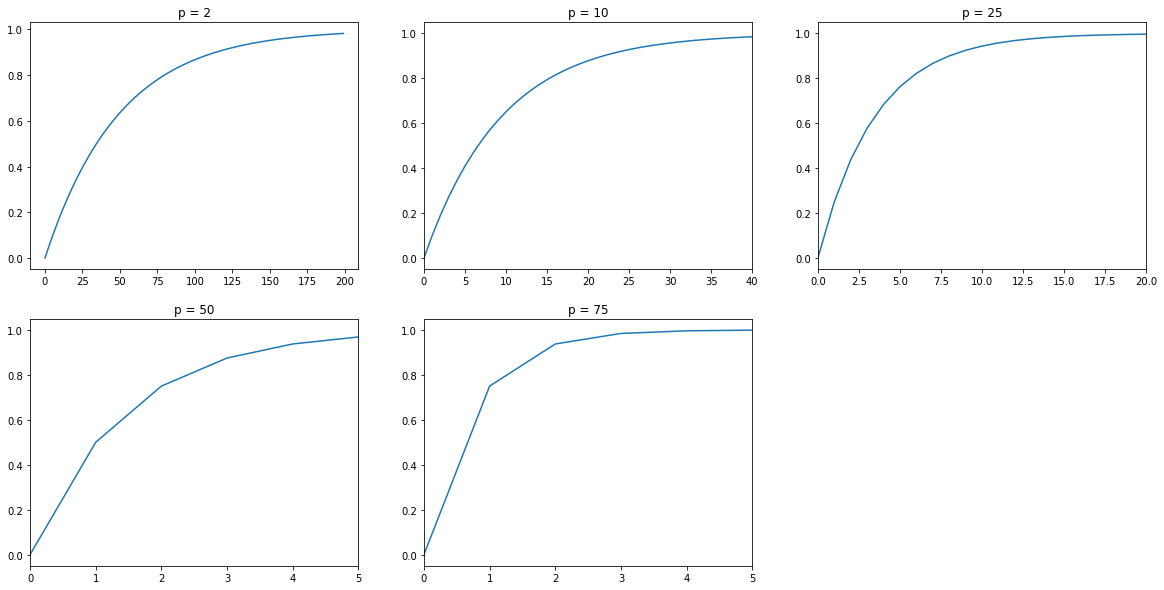

In [121]:
plt.figure(figsize=(20,10))
for i in range(len(Lista)):
    plt.subplot(2,3,i+1)
    plt.plot(Lista[i][:200])
    plt.title("p = {}".format(probabilidades[i]))
    if i == 1:
        plt.xlim(0,40)
    if i == 2:
        plt.xlim(0,20)
    if i in (3,4):
        plt.xlim(0,5)
plt.show()

In [ ]:
Lista = []
probabilidades = [1,2,3,5,10,15,20]
for p in probabilidades:
    lista = []
    for tiradas in range(1,501):
        lista.append(P_actualizado_actualizado(p,tiradas))
    print("p = {} completado".format(p))
    Lista.append(lista)

for i,lista in enumerate(Lista):
    print("\np = {}".format(probabilidades[i]))
    for tiradas in [1,2,4,10,25,50,100,200]:
        p = lista[tiradas-1]
        print("{} tiradas: {}% probabilidad de al menos 1 victoria".format(tiradas,p*100))

p = 1 completado
p = 2 completado


**Voy a trasponer: para cada nº de tiradas, ver la P en función de cada p:**

In [6]:
import numpy as np

In [38]:
Lista_array = np.array(Lista)
Lista_array_t = np.transpose(Lista_array)
Lista_array_t.shape

(500, 7)

In [39]:
probabilidades

[1, 2, 3, 5, 10, 15, 20]

In [40]:
tiradas = [1,2,4,10,25,100,200]
for tirada in tiradas:
    print("\n {} tiradas".format(tirada))
    for col,P in enumerate(Lista_array_t[tirada-1]):
        print("p = {}: {}% de probabilidad de al menos 1 victoria".format(probabilidades[col],P*100))


 1 tiradas
p = 1: 1.0% de probabilidad de al menos 1 victoria
p = 2: 1.9999999999999998% de probabilidad de al menos 1 victoria
p = 3: 3.0% de probabilidad de al menos 1 victoria
p = 5: 5.0% de probabilidad de al menos 1 victoria
p = 10: 10.0% de probabilidad de al menos 1 victoria
p = 15: 15.0% de probabilidad de al menos 1 victoria
p = 20: 20.0% de probabilidad de al menos 1 victoria

 2 tiradas
p = 1: 1.9900000000000002% de probabilidad de al menos 1 victoria
p = 2: 3.959999999999999% de probabilidad de al menos 1 victoria
p = 3: 5.91% de probabilidad de al menos 1 victoria
p = 5: 9.749999999999998% de probabilidad de al menos 1 victoria
p = 10: 19.0% de probabilidad de al menos 1 victoria
p = 15: 27.750000000000004% de probabilidad de al menos 1 victoria
p = 20: 36.00000000000001% de probabilidad de al menos 1 victoria

 4 tiradas
p = 1: 3.940399% de probabilidad de al menos 1 victoria
p = 2: 7.763183999999996% de probabilidad de al menos 1 victoria
p = 3: 11.470718999999999% de p